In [1]:
# Library imports
import tensorflow as tf
import numpy as np
keras = tf.keras
import matplotlib.pyplot as plt
import os
import sys

In [2]:
# Add src directory to path for local imports
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Local imports
from utils import gpu_grow_memory

In [3]:
gpu_grow_memory()

In [4]:
(img_trn, label_trn), (img_tst, label_tst) = tf.keras.datasets.mnist.load_data()

In [5]:
img_trn = img_trn.reshape((-1, 28, 28, 1))
img_tst = img_tst.reshape((-1, 28, 28, 1))

In [6]:
img_trn = img_trn / 255.0
img_tst = img_tst / 255.0

In [17]:
del inputs, x1, x2, outputs, model

In [24]:
inputs = keras.Input(shape=(28, 28, 1,), name='img')
x0 = keras.layers.Flatten()(inputs)
x1 = keras.layers.Dense(units=64, activation='relu', name='dense_1')(x0)
x2 = keras.layers.Dense(units=64, activation='relu', name='dense_2')(x1)
outputs = keras.layers.Dense(units=10, activation='softmax', name='outputs')(x2)

model = keras.Model(inputs=inputs, outputs=outputs, name='img_classifier')

In [25]:
model.summary()

Model: "img_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
outputs (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


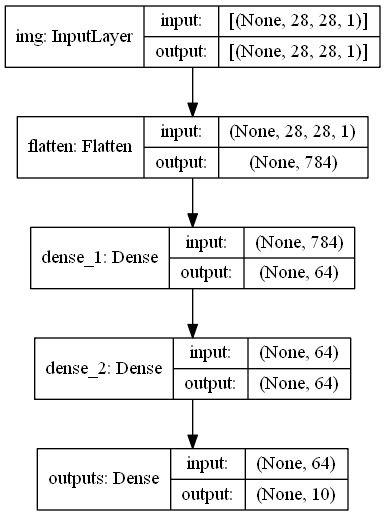

In [28]:
keras.utils.plot_model(model, 'my_model.png', show_shapes=True)

In [29]:
img_trn.shape

(60000, 28, 28, 1)

In [30]:
label_trn.shape

(60000,)

In [31]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])

history = model.fit(img_trn, label_trn, batch_size=64, epochs=10, validation_split=0.20)

W0617 14:37:35.283347 32020 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 63us/sample - loss: 0.3476 - accuracy: 0.9005 - val_loss: 0.1875 - val_accuracy: 0.9443
Epoch 2/10
48000/48000 [==============================] - 2s 52us/sample - loss: 0.1599 - accuracy: 0.9521 - val_loss: 0.1400 - val_accuracy: 0.9606
Epoch 3/10
48000/48000 [==============================] - 2s 49us/sample - loss: 0.1166 - accuracy: 0.9655 - val_loss: 0.1213 - val_accuracy: 0.9634
Epoch 4/10
48000/48000 [==============================] - 2s 50us/sample - loss: 0.0928 - accuracy: 0.9725 - val_loss: 0.1095 - val_accuracy: 0.9674
Epoch 5/10
48000/48000 [==============================] - 2s 49us/sample - loss: 0.0786 - accuracy: 0.9766 - val_loss: 0.0985 - val_accuracy: 0.9718
Epoch 6/10
48000/48000 [==============================] - 2s 50us/sample - loss: 0.0658 - accuracy: 0.9802 - val_loss: 0.0990 - val_accuracy: 0.9710
Epoch 7/10
48000/48000 [==============================] 

In [32]:
scores_test = model.evaluate(img_tst, label_tst)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.0935 - accuracy: 0.9753


In [33]:
print(f'Test loss {scores_test[0]:5.3f}')
print(f'Test accuracy {scores_test[1]:5.3f}')

Test loss 0.093
Test accuracy 0.975


In [50]:
encoder_input = keras.Input(shape=(28, 28, 1), name='image')
x1 = keras.layers.Conv2D(filters=16, kernel_size=(3,3,), activation='relu', name='conv_1')(encoder_input)
x2 = keras.layers.Conv2D(filters=32, kernel_size=(3,3,), activation='relu', name='conv_2')(x1)
x3 = keras.layers.MaxPooling2D(pool_size=(3,3,), name='pool_3')(x2)
x4 = keras.layers.Conv2D(filters=32, kernel_size=(3,3,), activation='relu', name='conv_4')(x3)
x5 = keras.layers.Conv2D(filters=16, kernel_size=(3,3,), activation='relu', name='conv_5')(x4)
encoder_output = keras.layers.GlobalMaxPooling2D(name='pool_6')(x5)

In [51]:
encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 32)        4640      
_________________________________________________________________
pool_3 (MaxPooling2D)        (None, 8, 8, 32)          0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 6, 6, 32)          9248      
_________________________________________________________________
conv_5 (Conv2D)              (None, 4, 4, 16)          4624      
_________________________________________________________________
pool_6 (GlobalMaxPooling2D)  (None, 16)                0   

In [63]:
x7 = keras.layers.Reshape((4,4,1,), name='reshape_7')(encoder_output)
x8 = keras.layers.Conv2DTranspose(filters=16, kernel_size=(3,3,), activation='relu', name='deconv_8')(x7)
x9 = keras.layers.Conv2DTranspose(filters=32, kernel_size=(3,3,), activation='relu', name='deconv_9')(x8)
x10 = keras.layers.UpSampling2D(size=(3,3,), name='up_sample_10')(x9)
x11 = keras.layers.Conv2DTranspose(filters=16, kernel_size=(3,3,), activation='relu', name='deconv_11')(x10)
decoder_output = keras.layers.Conv2DTranspose(filters=1, kernel_size=(3,3,), activation='relu', name='deconv_12')(x11)

In [65]:
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 32)        4640      
_________________________________________________________________
pool_3 (MaxPooling2D)        (None, 8, 8, 32)          0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 6, 6, 32)          9248      
_________________________________________________________________
conv_5 (Conv2D)              (None, 4, 4, 16)          4624      
_________________________________________________________________
pool_6 (GlobalMaxPooling2D)  (None, 16)                

In [67]:
decoder_input = keras.Input(shape=(16,), name='encoded_image')
x7 = keras.layers.Reshape((4,4,1,), name='reshape_7')(decoder_input)
x8 = keras.layers.Conv2DTranspose(filters=16, kernel_size=(3,3,), activation='relu', name='deconv_8')(x7)
x9 = keras.layers.Conv2DTranspose(filters=32, kernel_size=(3,3,), activation='relu', name='deconv_9')(x8)
x10 = keras.layers.UpSampling2D(size=(3,3,), name='up_sample_10')(x9)
x11 = keras.layers.Conv2DTranspose(filters=16, kernel_size=(3,3,), activation='relu', name='deconv_11')(x10)
decoder_output = keras.layers.Conv2DTranspose(filters=1, kernel_size=(3,3,), activation='relu', name='deconv_12')(x11)

In [68]:
decoder = keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoded_image (InputLayer)   [(None, 16)]              0         
_________________________________________________________________
reshape_7 (Reshape)          (None, 4, 4, 1)           0         
_________________________________________________________________
deconv_8 (Conv2DTranspose)   (None, 6, 6, 16)          160       
_________________________________________________________________
deconv_9 (Conv2DTranspose)   (None, 8, 8, 32)          4640      
_________________________________________________________________
up_sample_10 (UpSampling2D)  (None, 24, 24, 32)        0         
_________________________________________________________________
deconv_11 (Conv2DTranspose)  (None, 26, 26, 16)        4624      
_________________________________________________________________
deconv_12 (Conv2DTranspose)  (None, 28, 28, 1)         145 

In [70]:
autoencoder_input = keras.Input(shape=(28,28,1,), name='image')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name='autoencoder')

In [71]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Model)              (None, 16)                18672     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         9569      
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________


In [81]:
num_tags = 12
num_words = 10000
num_depts = 4

input_title = keras.Input(shape=(None,), name='title')
input_body = keras.Input(shape=(None,), name='body')
input_tags = keras.Input(shape=(num_tags,), name='tags')
inputs = [input_title, input_body, input_tags]

# feat_title = keras.layers.Embedding(num_words, 64, name='embed_title')(input_title)
# feat_body = keras.layers.Embedding(num_words, 64, name='embed_body')(input_body)

embed = keras.layers.Embedding(num_words, 64, name='embed_words')
feat_title = embed(input_title)
feat_body = embed(input_body)

# x_title = keras.layers.LSTM(128, name='lstm_title')(feat_title)
# x_body = keras.layers.LSTM(128, name='lstm_body')(feat_body)
lstm = keras.layers.LSTM(128, name='lstm_words')
x_title = lstm(feat_title)
x_body = lstm(feat_body)

x = keras.layers.concatenate([x_title, x_body, input_tags])

pred_priority = keras.layers.Dense(units=1, activation='sigmoid', name='priority')(x)
pred_dept = keras.layers.Dense(units=num_depts, activation='softmax', name='dept')(x)
outputs= [pred_priority, pred_dept]

model = keras.Model(inputs=inputs, outputs=outputs)

In [82]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
body (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
embed_words (Embedding)         (None, None, 64)     640000      title[0][0]                      
                                                                 body[0][0]                       
__________________________________________________________________________________________________
lstm_words (LSTM)               (None, 128)          98816       embed_words[0][0]          

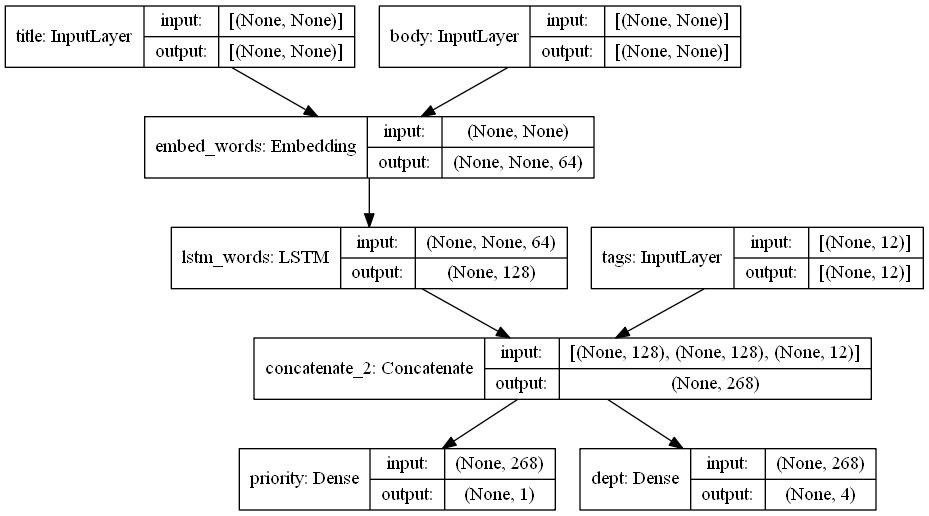

In [83]:
keras.utils.plot_model(model, show_shapes=True)

In [84]:
model.compile(optimizer=keras.optimizers.RMSprop(0.001), 
              loss={'priority':'binary_crossentropy', 'dept':'categorical_crossentropy'},
              loss_weights=[1.0, 0.2])

In [86]:
data_title = np.random.randint(num_words, size=(1280, 10))
data_body = np.random.randint(num_words, size=(1280, 100))
data_tags = np.random.randint(2, size=(1280, num_tags)).astype('float32')

targets_priority = np.random.random(size=(1280,1))
targets_dept = np.random.randint(2, size=(1280,num_depts))

In [87]:
model.fit({'title': data_title, 'body': data_body, 'tags': data_tags},
          {'priority': targets_priority, 'dept': targets_dept},
          epochs=1,
          batch_size=32)

Train on 1280 samples
Epoch 1/2
1280/1280 [==============================] - 29s 22ms/sample - loss: 1.2522 - priority_loss: 0.6966 - dept_loss: 2.7779
Epoch 2/2
1280/1280 [==============================] - 28s 22ms/sample - loss: 1.2254 - priority_loss: 0.6744 - dept_loss: 2.7549
